In [1]:
import pandas as pd
votes_df = pd.read_csv('https://github.com/HowTheyVote/data/releases/latest/download/votes.csv.gz', compression='gzip')

#print size
print(votes_df.shape)
votes_df.head()

(21958, 18)


,id,timestamp,display_title,reference,description,amendment_subject,amendment_number,is_main,procedure_reference,procedure_title,procedure_type,procedure_stage,count_for,count_against,count_abstention,count_did_not_vote,result,texts_adopted_reference
0,108425,2019-07-15 17:09:37,Mardi - demande du groupe GUE/NGL,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,83,142,72,454,NaN,NaN
1,108530,2019-07-18 11:30:02,The situation in Venezuela,RC-B9-0006/2019,§ 2/1,NaN,NaN,False,2019/2730(RSP),The situation in Venezuela,RSP,NaN,506,58,70,117,NaN,P9_TA(2019)0007
2,108531,2019-07-18 11:30:16,The situation in Venezuela,RC-B9-0006/2019,§ 2/2,NaN,NaN,False,2019/2730(RSP),The situation in Venezuela,RSP,NaN,414,184,51,102,NaN,P9_TA(2019)0007
3,108532,2019-07-18 11:30:30,The situation in Venezuela,RC-B9-0006/2019,Résolution,NaN,NaN,True,2019/2730(RSP),The situation in Venezuela,RSP,NaN,455,85,105,106,NaN,P9_TA(2019)0007
4,108533,2019-07-18 11:24:18,The situation at the USA-Mexican border,RC-B9-0014/2019,§ 13,NaN,NaN,False,2019/2733(RSP),The situation at the USA-Mexican border,RSP,NaN,311,269,33,138,NaN,P9_TA(2019)0005


In [2]:
import pandas as pd
members_df = pd.read_csv('https://github.com/HowTheyVote/data/releases/latest/download/members.csv.gz', compression='gzip')
members_df.head()

,id,first_name,last_name,country_code,date_of_birth,email,facebook,twitter
0,840,Charles,GOERENS,LUX,1952-02-06,charles.goerens@europarl.europa.eu,https://www.facebook.com/charles.goerens,https://twitter.com/CharlesGoerens
1,1294,Elio,DI RUPO,BEL,NaN,elio.dirupo@europarl.europa.eu,NaN,NaN
2,1394,Bill,NEWTON DUNN,GBR,NaN,NaN,NaN,NaN
3,1854,Constanze,KREHL,DEU,1956-10-14,NaN,NaN,NaN
4,1892,Carlos,COELHO,PRT,1960-05-20,NaN,NaN,NaN


In [3]:
import pandas as pd
members_votes_df = pd.read_csv('https://github.com/HowTheyVote/data/releases/latest/download/member_votes.csv.gz', compression='gzip')

#print size
print(members_votes_df.shape)
members_votes_df.head()

(15539848, 5)


,vote_id,member_id,position,country_code,group_code
0,108425,840,DID_NOT_VOTE,LUX,RENEW
1,108425,1394,AGAINST,GBR,RENEW
2,108425,1854,ABSTENTION,DEU,SD
3,108425,1909,ABSTENTION,DEU,SD
4,108425,1913,ABSTENTION,DEU,SD


In [97]:
import pandas as pd

# --- Load datasets ---
votes = pd.read_csv("data/all_votes_old_EP9_2022.csv")
docs = pd.read_csv("data/votewatch_csv/EP9_Voted docs.csv")

# --- Normalize column names ---
votes.columns = votes.columns.str.strip()
docs.columns = docs.columns.str.strip()

# --- Filter Aldo Patriciello ---
mask = (
    votes["member.first_name"].str.lower().eq("aldo")
    & votes["member.last_name"].str.lower().eq("patriciello")
)
aldo = votes.loc[mask]

# --- Identify vote columns (they are numeric strings) ---
vote_cols = [c for c in aldo.columns if c.isdigit()]

# --- Melt to long format ---
aldo_long = aldo.melt(
    value_vars=vote_cols,
    var_name="Vote ID",
    value_name="Position"
)
aldo_long["Vote ID"] = aldo_long["Vote ID"].astype(int)

# --- Find first DID_NOT_VOTE ---
first_dnv = aldo_long.query("Position == 'DID_NOT_VOTE'").sort_values("Vote ID").head(1)

# --- Merge with metadata from EP9_Voted docs ---
first_dnv = first_dnv.merge(
    docs[["Vote ID", "Title", "Date"]],
    on="Vote ID",
    how="left"
)

print("=== First time Aldo Patriciello DID NOT VOTE ===")
print(first_dnv)

=== First time Aldo Patriciello DID NOT VOTE ===
   Vote ID      Position                                   Title        Date
0        1  DID_NOT_VOTE  Tuesday - request by the GUE/NGL group  15.07.2019


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("data/all_votes_old_EP9_2022.csv")

# Make sure column names match (adapt if needed)
# Typically, columns might include "member.first_name", "member.last_name", and vote columns (as numbers)
df.columns = df.columns.str.strip()

# Find Aldo Patriciello (case-insensitive)
mask_mep = (
    df["member.first_name"].str.lower().eq("aldo")
    & df["member.last_name"].str.lower().eq("patriciello")
)

# Select his row
aldo_row = df.loc[mask_mep]

# Extract votes that are 'FOR'
votes_for = aldo_row.T[aldo_row.T.iloc[:, 0] == "FOR"]
votes_for = votes_for.reset_index().rename(columns={"index": "vote_id", 0: "vote"})

print(f"✅ Aldo Patriciello voted FOR in {len(votes_for)} resolutions.")
print(votes_for.head())

In [1]:
import requests
import pandas as pd

# Get the 50 most recent votes
url = "https://howtheyvote.eu/api/votes?page=1&page_size=50&sort_by=timestamp&sort_order=desc"
resp = requests.get(url, timeout=30)
resp.raise_for_status()
votes = resp.json()["results"]

print(f"Fetched {len(votes)} recent votes.")
print("Example:", votes[0]["display_title"], votes[0]["id"])

Fetched 50 recent votes.
Example: Situation in Colombia after the wave of recent terrorist attacks 178875


In [2]:
# Download CSVs for the 50 most recent votes
import os
import requests
import pandas as pd
from pathlib import Path

BASE = Path("data/latest_50")
BASE.mkdir(parents=True, exist_ok=True)

api_url = "https://howtheyvote.eu/api/votes?page=1&page_size=50&sort_by=timestamp&sort_order=desc"
resp = requests.get(api_url, timeout=30)
resp.raise_for_status()
results = resp.json()["results"]

print(f"Found {len(results)} recent votes")

def resolve_csv_urls(vote):
    vid = vote["id"]
    candidates = []
    # 1) API may expose a direct csv_url field
    u = vote.get("csv_url")
    if u:
        candidates.append(u)
    # 2) Construct common patterns (with and without www)
    candidates.append(f"https://howtheyvote.eu/api/votes/{vid}.csv")
    candidates.append(f"https://www.howtheyvote.eu/api/votes/{vid}.csv")
    return candidates

session = requests.Session()
headers = {"User-Agent": "EP-research/1.0"}

def try_download_csv(url):
    try:
        r = session.get(url, timeout=30, headers=headers)
        if r.status_code == 200 and "text" in r.headers.get("Content-Type", ""):
            return r.text
    except Exception:
        pass
    return None

for v in results:
    vid = v["id"]
    title = v.get("display_title", "").strip().replace("/", "-")
    out_file = BASE / f"{vid}.csv"
    if out_file.exists():
        print(f"Skip existing {out_file.name}")
        continue

    content = None
    for url in resolve_csv_urls(v):
        content = try_download_csv(url)
        if content:
            break

    if content:
        out_file.write_text(content, encoding="utf-8")
        print(f"Saved {out_file.name}: {title[:80]}")
    else:
        print(f"Failed {vid}: no CSV available from known endpoints")


Found 50 recent votes
Skip existing 178875.csv
Skip existing 179048.csv
Skip existing 178399.csv
Skip existing 178397.csv
Skip existing 178291.csv
Skip existing 178484.csv
Skip existing 178979.csv
Skip existing 178988.csv
Skip existing 178788.csv
Skip existing 178500.csv
Skip existing 178400.csv
Skip existing 178281.csv
Skip existing 178389.csv
Skip existing 178731.csv
Skip existing 178386.csv
Skip existing 178385.csv
Skip existing 178425.csv
Skip existing 178401.csv
Skip existing 178406.csv
Skip existing 178405.csv
Skip existing 178285.csv
Skip existing 178767.csv
Skip existing 178702.csv
Skip existing 178334.csv
Skip existing 178384.csv
Skip existing 178424.csv
Skip existing 178387.csv
Skip existing 178336.csv
Skip existing 178472.csv
Skip existing 178231.csv
Skip existing 177697.csv
Skip existing 178147.csv
Skip existing 178245.csv
Skip existing 178218.csv
Skip existing 178219.csv
Skip existing 178149.csv
Skip existing 178062.csv
Skip existing 177739.csv
Skip existing 177786.csv
Ski

In [4]:
# Download ALL votes after the last election (from 2024-06-09 to now)
import requests
from pathlib import Path
from datetime import datetime, timezone
import time

OUT = Path("data/post_2024_06_09")
OUT.mkdir(parents=True, exist_ok=True)

cutoff = datetime(2024, 6, 9, tzinfo=timezone.utc)

# Paginate descending by timestamp until we reach before cutoff
collected = []
page = 1
page_size = 100
while True:
    url = f"https://howtheyvote.eu/api/votes?page={page}&page_size={page_size}&sort_by=timestamp&sort_order=desc"
    r = requests.get(url, timeout=30)
    r.raise_for_status()
    results = r.json().get("results", [])
    if not results:
        break
    reached_older = False
    for v in results:
        ts = v.get("timestamp")  # e.g. '2024-06-12T14:23:00Z'
        if not ts:
            continue
        # Normalize to aware datetime
        try:
            # Accept Z or offset
            ts_norm = ts.replace("Z", "+00:00")
            dt = datetime.fromisoformat(ts_norm)
            if dt.tzinfo is None:
                dt = dt.replace(tzinfo=timezone.utc)
        except Exception:
            # Fallback: skip unparsable
            continue
        if dt >= cutoff:
            collected.append(v)
        else:
            reached_older = True
    if reached_older:
        break
    page += 1
    time.sleep(0.2)

print(f"Votes after 2024-06-09 collected: {len(collected)}")

# Reuse resolver/downloader if present; else define
try:
    resolve_csv_urls
    try_download_csv
except NameError:
    def resolve_csv_urls(vote):
        vid = vote["id"]
        candidates = []
        u = vote.get("csv_url")
        if u:
            candidates.append(u)
        candidates.append(f"https://howtheyvote.eu/api/votes/{vid}.csv")
        candidates.append(f"https://www.howtheyvote.eu/api/votes/{vid}.csv")
        return candidates
    session = requests.Session()
    headers = {"User-Agent": "EP-research/1.0"}
    def try_download_csv(url):
        try:
            r = session.get(url, timeout=30, headers=headers)
            if r.status_code == 200 and "text" in r.headers.get("Content-Type", ""):
                return r.text
        except Exception:
            pass
        return None

# Download CSVs
saved = 0
for v in collected:
    vid = v["id"]
    title = v.get("display_title", "").strip().replace("/", "-")
    out_file = OUT / f"{vid}.csv"
    if out_file.exists():
        print(f"Skip existing {out_file.name}")
        continue
    content = None
    for url in resolve_csv_urls(v):
        content = try_download_csv(url)
        if content:
            break
    if content:
        out_file.write_text(content, encoding="utf-8")
        print(f"Saved {out_file.name}: {title[:80]}")
        saved += 1
    else:
        print(f"Failed {vid}: no CSV available from known endpoints")

print(f"Saved {saved} CSVs to {OUT}")


Votes after 2024-06-09 collected: 238
Skip existing 178875.csv
Skip existing 179048.csv
Skip existing 178399.csv
Skip existing 178397.csv
Skip existing 178291.csv
Skip existing 178484.csv
Skip existing 178979.csv
Skip existing 178988.csv
Skip existing 178788.csv
Skip existing 178500.csv
Skip existing 178400.csv
Skip existing 178281.csv
Skip existing 178389.csv
Skip existing 178731.csv
Skip existing 178386.csv
Skip existing 178385.csv
Skip existing 178425.csv
Skip existing 178401.csv
Skip existing 178406.csv
Skip existing 178405.csv
Skip existing 178285.csv
Skip existing 178767.csv
Skip existing 178702.csv
Skip existing 178334.csv
Skip existing 178384.csv
Skip existing 178424.csv
Skip existing 178387.csv
Skip existing 178336.csv
Skip existing 178472.csv
Skip existing 178231.csv
Skip existing 177697.csv
Skip existing 178147.csv
Skip existing 178245.csv
Skip existing 178218.csv
Skip existing 178219.csv
Skip existing 178149.csv
Skip existing 178062.csv
Skip existing 177739.csv
Skip existin

In [50]:
# Download ALL votes from 2021-01-01 until 2024-06-09 (pre-election)
import requests
from pathlib import Path
from datetime import datetime, timezone
import time

OUT = Path("data/2018_to_2024")
OUT.mkdir(parents=True, exist_ok=True)

start_dt = datetime(2018, 1, 1, tzinfo=timezone.utc)
end_dt = datetime(2024, 6, 9, tzinfo=timezone.utc)

# Paginate descending; collect between start_dt (inclusive) and end_dt (exclusive)
collected = []
page = 1
page_size = 100
stop = False
while not stop:
    url = f"https://howtheyvote.eu/api/votes?page={page}&page_size={page_size}&sort_by=timestamp&sort_order=desc"
    r = requests.get(url, timeout=30)
    r.raise_for_status()
    results = r.json().get("results", [])
    if not results:
        break
    older_than_start_seen = False
    for v in results:
        ts = v.get("timestamp")
        if not ts:
            continue
        try:
            ts_norm = ts.replace("Z", "+00:00")
            dt = datetime.fromisoformat(ts_norm)
            if dt.tzinfo is None:
                dt = dt.replace(tzinfo=timezone.utc)
        except Exception:
            continue
        if dt >= end_dt:
            # after our upper bound; skip but continue pagination
            continue
        if dt < start_dt:
            older_than_start_seen = True
            continue
        collected.append(v)
    if older_than_start_seen:
        break
    page += 1
    time.sleep(0.2)

print(f"Votes collected: {len(collected)}")

# Reuse resolver/downloader if present; else define
try:
    resolve_csv_urls
    try_download_csv
except NameError:
    def resolve_csv_urls(vote):
        vid = vote["id"]
        candidates = []
        u = vote.get("csv_url")
        if u:
            candidates.append(u)
        candidates.append(f"https://howtheyvote.eu/api/votes/{vid}.csv")
        candidates.append(f"https://www.howtheyvote.eu/api/votes/{vid}.csv")
        return candidates
    session = requests.Session()
    headers = {"User-Agent": "EP-research/1.0"}
    def try_download_csv(url):
        try:
            r = session.get(url, timeout=30, headers=headers)
            if r.status_code == 200 and "text" in r.headers.get("Content-Type", ""):
                return r.text
        except Exception:
            pass
        return None

# Download CSVs
saved = 0
for v in collected:
    vid = v["id"]
    title = v.get("display_title", "").strip().replace("/", "-")
    out_file = OUT / f"{vid}.csv"
    if out_file.exists():
        print(f"Skip existing {out_file.name}")
        continue
    content = None
    for url in resolve_csv_urls(v):
        content = try_download_csv(url)
        if content:
            break
    if content:
        out_file.write_text(content, encoding="utf-8")
        print(f"Saved {out_file.name}: {title[:80]}")
        saved += 1
    else:
        print(f"Failed {vid}: no CSV available from known endpoints")

print(f"Saved {saved} CSVs to {OUT}")


Votes between 2021-01-01 and 2024-06-09 collected: 1804
Saved 168321.csv: Draft amending budget No 1-2024: Amendments of the 2024 budget required due to t
Saved 168326.csv: Advance passenger information: prevention, detection, investigation and prosecut
Saved 168446.csv: Advance passenger information: enhancing and facilitating external border contro
Saved 168485.csv: Framework of measures for strengthening Europe’s net-zero technology products ma
Saved 168833.csv: Draft Amending Budget 3-2024: Reinforcing the European Public Prosecutor's Offic
Saved 168984.csv: Interinstitutional Body for Ethical Standards
Saved 169085.csv: Estimates of revenue and expenditure for the financial year 2025 – Section I – E
Saved 169153.csv: Russia’s undemocratic presidential elections and their illegitimate extension to
Saved 169157.csv: Azerbaijan, notably the repression of civil society and the cases of Dr Gubad Ib
Saved 169182.csv: Iran’s unprecedented attack against Israel, the need for de-escalation

In [80]:
import requests
from pathlib import Path
from datetime import datetime, timezone
import time
import json

OUT = Path("data/EP9")
OUT.mkdir(parents=True, exist_ok=True)

end_dt = datetime(2024, 6, 6, tzinfo=timezone.utc)
start_dt = datetime(2019, 5, 26, tzinfo=timezone.utc)

session = requests.Session()
session.headers.update({"User-Agent": "EP-research/1.0"})

collected = []
page = 1
page_size = 100
stop = False

while not stop:
    url = f"https://howtheyvote.eu/api/votes?page={page}&page_size={page_size}&sort_by=date&sort_order=desc"
    r = session.get(url, timeout=30)
    r.raise_for_status()
    data = r.json()
    results = data.get("results", [])
    if not results:
        break

    older_than_start_seen = False
    for v in results:
        ts = v.get("timestamp")
        if not ts:
            continue
        ts_norm = ts.replace("Z", "+00:00")
        dt = datetime.fromisoformat(ts_norm)
        if dt.tzinfo is None:
            dt = dt.replace(tzinfo=timezone.utc)

        if dt >= end_dt:
            continue
        if dt < start_dt:
            older_than_start_seen = True
            continue
        collected.append(v)

    print(f"Page {page}: collected {len(collected)} votes so far")
    if older_than_start_seen:
        break
    page += 1
    time.sleep(0.25)

print(f"✅ Total votes collected: {len(collected)}")

# Save metadata for reference
meta_path = OUT / "votes_metadata.json"
meta_path.write_text(json.dumps(collected, indent=2), encoding="utf-8")

# --- Downloader helpers ---
def resolve_csv_urls(vote):
    vid = vote["id"]
    return [
        f"https://howtheyvote.eu/api/votes/{vid}.csv",
        f"https://www.howtheyvote.eu/api/votes/{vid}.csv",
    ]

def try_download_csv(url):
    try:
        r = session.get(url, timeout=30)
        if r.status_code == 200 and "text" in r.headers.get("Content-Type", ""):
            return r.text
    except Exception:
        pass
    return None

# --- Download all CSVs (both main and amendment votes) ---
saved = 0
for v in collected:
    vid = v["id"]
    is_main = v.get("is_main", None)
    title = v.get("display_title", "").strip().replace("/", "-")
    out_file = OUT / f"{vid}.csv"
    if out_file.exists():
        continue

    content = None
    for url in resolve_csv_urls(v):
        content = try_download_csv(url)
        if content:
            break

    if content:
        out_file.write_text(content, encoding="utf-8")
        saved += 1
        print(f"Saved {out_file.name} (main={is_main})")
    else:
        print(f"Failed to get CSV for {vid}")

print(f"✅ Saved {saved} CSVs to {OUT}")

Page 1: collected 0 votes so far
Page 2: collected 0 votes so far
Page 3: collected 24 votes so far
Page 4: collected 124 votes so far
Page 5: collected 224 votes so far
Page 6: collected 324 votes so far
Page 7: collected 424 votes so far
Page 8: collected 524 votes so far
Page 9: collected 624 votes so far
Page 10: collected 724 votes so far
Page 11: collected 824 votes so far
Page 12: collected 924 votes so far
Page 13: collected 1024 votes so far
Page 14: collected 1124 votes so far
Page 15: collected 1224 votes so far
Page 16: collected 1324 votes so far
Page 17: collected 1424 votes so far
Page 18: collected 1524 votes so far
Page 19: collected 1624 votes so far
Page 20: collected 1724 votes so far
Page 21: collected 1804 votes so far
✅ Total votes collected: 1804
✅ Saved 0 CSVs to data/EP9


In [78]:
import requests

page = 1
res = requests.get("https://howtheyvote.eu/api/votes?is_main=true&page=1&page_size=50").json()
types = set(v.get("description", "") for v in res["results"])
print(types)

{'Accord provisoire - Am 146', 'Proposition de résolution', 'Accord provisoire - Am 32', 'Proposition de la Commission', 'Proposition de la Commission au Conseil', 'Accord provisoire - Am 20', 'Accord provisoire - Am 52', 'Proposition de résolution (ensemble du texte)', 'Accord provisoire - Am 54', 'Accord provisoire - Am 162', 'Accord provisoire - Am 79', 'Accord provisoire - Am 215', 'Projet de décision du Conseil'}


In [73]:
# Build all_votes.csv: one row per MEP with attributes and one column per vote
import pandas as pd
from glob import glob
from pathlib import Path

folder = Path("data/EP9")
files = sorted(glob(str(folder / "*.csv")))

parts = []
for f in files:
    df = pd.read_csv(f)
    vote_id = Path(f).stem
    df = df.copy()
    df["vote_id"] = vote_id
    parts.append(df)

all_df = pd.concat(parts, ignore_index=True)
# Drop any duplicated column names caused by merges
all_df = all_df.loc[:, ~all_df.columns.duplicated()]

# Normalize position
if "position" in all_df.columns:
    all_df["position"] = all_df["position"].astype(str).str.replace("VotePosition.", "", regex=False)

# Resolve the member.id column name safely (handle duplicates if present)
member_id_col = [c for c in all_df.columns if c == "member.id"][0]

# Choose attribute columns to carry over (everything except the per-vote position)
# Keep the latest seen attributes per member.id
attr_cols = [c for c in all_df.columns if not c.startswith("vote_") and c != "position" and c != "vote_id" and c != member_id_col]
attr_df = (all_df
           .sort_values([member_id_col, "vote_id"])  # deterministic
           .drop_duplicates(subset=[member_id_col], keep="last")
           [[member_id_col] + attr_cols])
# deduplicate columns just in case
attr_df = attr_df.loc[:, ~attr_df.columns.duplicated()]

# Pivot votes: columns per vote_id with values = position
pivot_df = (all_df
            .pivot_table(index=member_id_col, columns="vote_id", values="position", aggfunc="first")
            .reset_index())
pivot_df = pivot_df.loc[:, ~pivot_df.columns.duplicated()]

# Combine via merge on member id
wide = pd.merge(attr_df, pivot_df, on=member_id_col, how="outer")
wide = wide.loc[:, ~wide.columns.duplicated()]

out_path = folder / "all_votes.csv"
wide.to_csv(out_path, index=False)
print("Wrote:", out_path, "shape:", wide.shape)


Wrote: data/EP9/all_votes.csv shape: (870, 1813)


In [82]:
with open("member_votes.csv.gz", "rb") as f:
    head = f.read(200)
print(head[:100])

b'\x1f\x8b\x08\x08\xe4b\xf4h\x00\x03member_votes.csv\x00\x8c\xfdM\xaf\xfc\xba\x9a%\xf8\xcd\r\xf8\x9b\xdc\xc1\xa6$\x8a\xe20\xab*+}\x90\xe9\x9b\x85soe\xb9zR\x80\xbb\x1bF\x0f\xba\xab\xd1n\x1b\xf0\xb7\xf7\x96\xb8\x18!\x91k\xadG\x93\x83\x83\xffzB\xa1\xd0\xd6\x0bEQ?\xfe\x7f\xff\xfb\xff'


/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_53976/1242169997.py:5: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

   member.id  num_for  num_against  num_abstention  num_did_not_vote
0        840     2766           64              56                 0
1       1854     1172           40              24                 0
2       1892     1058           54              20                 0
3       1909     2412           54              38                 0
4       1913      556           34               8                 0


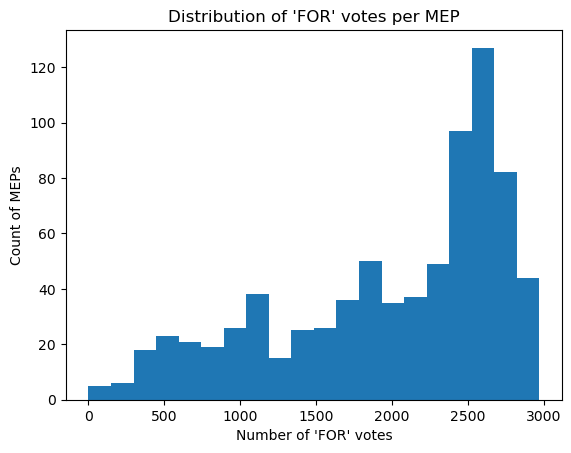

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined votes file
votes_df = pd.read_csv(folder / "all_votes.csv")

# Identify vote columns (exclude attribute columns)
vote_columns = [col for col in votes_df.columns if col not in attr_cols + [member_id_col]]

# Count occurrences for each vote type per row
for vote_type in ["FOR", "AGAINST", "ABSTENTION", "DID NOT VOTE"]:
    votes_df[f"num_{vote_type.replace(' ', '_').lower()}"] = (votes_df[vote_columns] == vote_type).sum(axis=1)

# Show the counts for the first few lines
display_cols = [member_id_col] + [f"num_{vt.replace(' ', '_').lower()}" for vt in ["FOR", "AGAINST", "ABSTENTION", "DID NOT VOTE"]]
print(votes_df[display_cols].head())

# 👉 Count total number of "FOR" votes per MEP (or per row)
for_counts = votes_df["num_for"]

# (optional) Plot them
plt.figure()
plt.hist(for_counts, bins=20)
plt.title("Distribution of 'FOR' votes per MEP")
plt.xlabel("Number of 'FOR' votes")
plt.ylabel("Count of MEPs")
plt.show()

/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_53976/4124066548.py:5: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

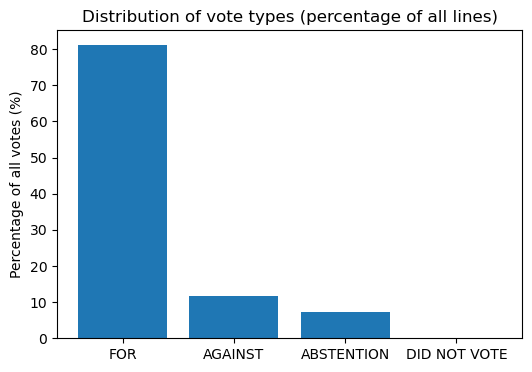

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined votes file
votes_df = pd.read_csv(folder / "all_votes.csv")

# Identify vote columns (exclude attribute columns)
vote_columns = [col for col in votes_df.columns if col not in attr_cols + [member_id_col]]

# Count occurrences for each vote type per row
vote_types = ["FOR", "AGAINST", "ABSTENTION", "DID NOT VOTE"]
for vote_type in vote_types:
    votes_df[f"num_{vote_type.replace(' ', '_').lower()}"] = (votes_df[vote_columns] == vote_type).sum(axis=1)

# Compute total number of votes per type across all lines
totals = [votes_df[f"num_{vt.replace(' ', '_').lower()}"].sum() for vt in vote_types]

# Convert to percentages
total_votes = sum(totals)
percentages = [t / total_votes * 100 for t in totals]

# Plot in percentages
plt.figure(figsize=(6,4))
plt.bar(vote_types, percentages)
plt.ylabel("Percentage of all votes (%)")
plt.title("Distribution of vote types (percentage of all lines)")
plt.show()

In [25]:
import csv
import math
import time
import requests
from pathlib import Path

OUT_CSV = Path("data/all_votes_with_subjects.csv")
OUT_TXT = Path("data/all_votes_with_subjects.txt")
OUT_CSV.parent.mkdir(parents=True, exist_ok=True)

BASE_API = "https://howtheyvote.eu/api/votes"
HEADERS = {"User-Agent": "EP-research/1.0"}
PAGE_SIZE = 200

session = requests.Session()

def flatten_subjects(vote):
    """Extract OEIL subject labels as a single string."""
    subjects = []
    for subj in vote.get("oeil_subjects", []):
        label = subj.get("label")
        if label:
            subjects.append(label.strip())
    if not subjects:
        # fallback to eurovoc or geo_areas if relevant
        eurovoc = [e.get("label") for e in vote.get("eurovoc_concepts", []) if e.get("label")]
        if eurovoc:
            subjects.extend(eurovoc)
    return "; ".join(subjects) if subjects else ""

def flatten_geo(vote):
    """Return comma-separated geographic labels (countries/regions)."""
    geos = [g.get("label") for g in vote.get("geo_areas", []) if g.get("label")]
    return ", ".join(geos)

def normalize_vote(v):
    vid = v.get("id")
    title = v.get("display_title") or v.get("title") or ""
    timestamp = v.get("timestamp")
    subjects = flatten_subjects(v)
    geo = flatten_geo(v)
    csv_url = f"https://howtheyvote.eu/api/votes/{vid}.csv"
    return {
        "id": vid,
        "title": title.strip(),
        "timestamp": timestamp,
        "subjects": subjects,
        "geo_areas": geo,
        "csv_url": csv_url,
    }

def fetch_page(page: int):
    params = {"page": page, "page_size": PAGE_SIZE, "sort_by": "timestamp", "sort_order": "desc"}
    r = session.get(BASE_API, params=params, headers=HEADERS, timeout=60)
    r.raise_for_status()
    return r.json()

def main():
    first = fetch_page(1)
    total = first.get("total") or first.get("count") or len(first.get("results", []))
    total_pages = math.ceil(total / PAGE_SIZE)
    print(f"Found {total} votes across ~{total_pages} pages")

    fieldnames = ["id", "title", "timestamp", "subjects", "geo_areas", "csv_url"]

    with OUT_CSV.open("w", newline="", encoding="utf-8") as fcsv, OUT_TXT.open("w", encoding="utf-8") as ftxt:
        writer = csv.DictWriter(fcsv, fieldnames=fieldnames)
        writer.writeheader()

        for page in range(1, total_pages + 1):
            data = fetch_page(page)
            results = data.get("results", [])
            if not results:
                break

            for v in results:
                row = normalize_vote(v)
                writer.writerow(row)
                # Write concise text mapping
                ftxt.write(f"{row['id']} | {row['subjects'] or 'No subjects'}\n")

            print(f"Page {page}/{total_pages} done ({len(results)} votes)")
            time.sleep(0.2)

    print(f"✅ Done.\nCSV saved to {OUT_CSV}\nTXT summary saved to {OUT_TXT}")

if __name__ == "__main__":
    main()

Found 2042 votes across ~11 pages
Page 1/11 done (200 votes)
Page 2/11 done (200 votes)
Page 3/11 done (200 votes)
Page 4/11 done (200 votes)
Page 5/11 done (200 votes)
Page 6/11 done (200 votes)
Page 7/11 done (200 votes)
Page 8/11 done (200 votes)
Page 9/11 done (200 votes)
Page 10/11 done (200 votes)
Page 11/11 done (42 votes)
✅ Done.
CSV saved to data/all_votes_with_subjects.csv
TXT summary saved to data/all_votes_with_subjects.txt


In [32]:
# list all subjects in the data
import pandas as pd

# Read the CSV file
df = pd.read_csv("data/all_votes_with_subjects.csv")
unique_subjects = (
    df['subjects']
      .fillna('')
      .str.split(';')
      .explode()
      .str.strip()
      .replace('', pd.NA)
      .dropna()
      .drop_duplicates()
      .sort_values()
)

for s in unique_subjects:
    print(s)


2017 discharge
2018 discharge
2019 budget
2019 discharge
2020 budget
2020 discharge
2021 budget
2021 discharge
2022 budget
2022 discharge
2023 budget
2023 discharge
2024 budget
2025 budget
2026 budget
Action against counterfeiting
Action to combat crime
Action to combat drugs and drug-trafficking
Action to combat economic fraud and corruption
Action to combat racism and xenophobia
Action to combat terrorism
Action to combat violence, trafficking in human beings and migrant smuggling
Aeronautical industry, aerospace industry
Agencies and bodies of the EU
Agreements and relations in the context of the World Trade Organization (WTO)
Agricultural policy and economies
Agricultural statistics
Agricultural structures and holdings, farmers
Agrimonetary policy, compensatory amounts
Agro-genetics, GMOs
Air transport agreements and cooperation
Air transport and air freight
Alternative and renewable energies
Animal diseases
Animal health requirements, veterinary legislation and pharmacy
Animal pro

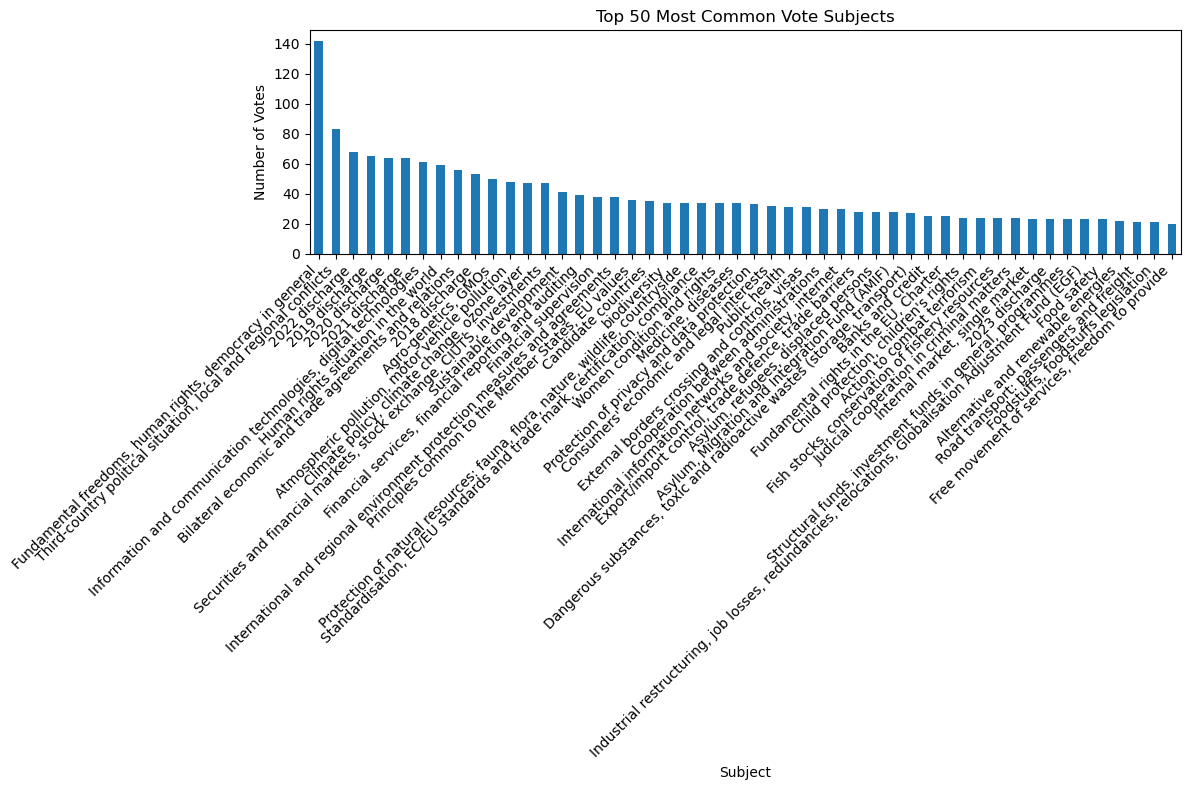

In [36]:
# plot count of unique subjects in the votes, e.g. how many resolutions with "Transport statistics" in the subjects
import matplotlib.pyplot as plt

# Count the number of votes per subject
subject_counts = (
    df['subjects']
      .fillna('')
      .str.split(';')
      .explode()
      .str.strip()
      .replace('', pd.NA)
      .dropna()
      .value_counts()
      .sort_values(ascending=False)
)

# Plot the top N subjects (e.g., top 20)
N = 50
plt.figure(figsize=(12, 8))
subject_counts.head(N).plot(kind='bar')
plt.title(f"Top {N} Most Common Vote Subjects")
plt.xlabel("Subject")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





In [37]:
# --- Macrotopic constants ---
GOV = "Governance, Democracy & Institutional Affairs"
FOREIGN = "Foreign Policy, Security & Human Rights"
ENV = "Environment, Climate & Energy"
AGRI = "Agriculture, Fisheries & Rural Development"
ECON = "Economy, Trade & Industry"
BUDG = "Budget, Finance & Fiscal Policy"
SOCIAL = "Social Policy, Cohesion & Employment"
HEALTH = "Health, Safety & Consumer Protection"
TECH = "Technology, Digital & Innovation"
JUSTICE = "Justice, Rule of Law & Fundamental Rights"
MIGSEC = "Migration, Security & Civil Protection"
DEV = "Development, Humanitarian & Global Partnerships"

UNKNOWN = "Unclassified"

# --- Microtopic -> Macrotopic mapping (covers all items you provided) ---
MICRO_TO_MACRO = {
    # Budgets / Discharge
    "2017 discharge": BUDG,
    "2018 discharge": BUDG,
    "2019 budget": BUDG,
    "2019 discharge": BUDG,
    "2020 budget": BUDG,
    "2020 discharge": BUDG,
    "2021 budget": BUDG,
    "2021 discharge": BUDG,
    "2022 budget": BUDG,
    "2022 discharge": BUDG,
    "2023 budget": BUDG,
    "2023 discharge": BUDG,
    "2024 budget": BUDG,
    "2025 budget": BUDG,
    "2026 budget": BUDG,

    # Justice / Security / Crime
    "Action against counterfeiting": JUSTICE,
    "Action to combat crime": JUSTICE,
    "Action to combat drugs and drug-trafficking": JUSTICE,
    "Action to combat economic fraud and corruption": JUSTICE,
    "Action to combat racism and xenophobia": JUSTICE,
    "Action to combat terrorism": FOREIGN,  # external/security dimension; could also be MIGSEC/Justice
    "Action to combat violence, trafficking in human beings and migrant smuggling": MIGSEC,

    # Industry / Transport / Energy
    "Aeronautical industry, aerospace industry": ECON,
    "Agencies and bodies of the EU": GOV,
    "Agreements and relations in the context of the World Trade Organization (WTO)": ECON,
    "Agricultural policy and economies": AGRI,
    "Agricultural statistics": AGRI,
    "Agricultural structures and holdings, farmers": AGRI,
    "Agrimonetary policy, compensatory amounts": AGRI,
    "Agro-genetics, GMOs": TECH,
    "Air transport agreements and cooperation": ECON,
    "Air transport and air freight": ECON,
    "Alternative and renewable energies": ENV,
    "Animal diseases": HEALTH,
    "Animal health requirements, veterinary legislation and pharmacy": HEALTH,
    "Animal protection": AGRI,
    "Aquaculture": AGRI,
    "Area of freedom, security and justice": JUSTICE,
    "Armaments control, non-proliferation nuclear weapons": FOREIGN,
    "Arrangement of working time, work schedules": SOCIAL,
    "Asylum, Migration and Integration Fund (AMIF)": MIGSEC,
    "Asylum, refugees, displaced persons": MIGSEC,
    "Atmospheric pollution, motor vehicle pollution": ENV,
    "Audiovisual industry and services": ECON,

    # Finance / Trade / Competition
    "Banks and credit": BUDG,
    "Bilateral economic and trade agreements and relations": ECON,
    "Budget of the Union": BUDG,
    "Budgetary control and discharge, implementation of the budget": BUDG,
    "Building industry": ECON,
    "Business environment, reduction of the administrative burdens": ECON,
    "Business of Parliament, procedure, sittings, rules of procedure": GOV,
    "Business policy, e-commerce, after-sales service, commercial distribution": ECON,
    "Candidate countries": FOREIGN,
    "Capital outflow, money laundering": JUSTICE,
    "Cereals, rice": AGRI,
    "Chemical industry, fertilizers, plastics": ECON,
    "Child protection, children's rights": SOCIAL,
    "Citizen's rights": GOV,
    "Civil protection": MIGSEC,
    "Climate policy, climate change, ozone layer": ENV,
    "Clinical practice and experiments": HEALTH,
    "Cohesion policy, Cohesion Fund (CF)": SOCIAL,
    "Combined transport, multimodal transport": ECON,
    "Committees, interparliamentary delegations": GOV,
    "Common commercial policy in general": ECON,
    "Common cultural area, cultural diversity": SOCIAL,
    "Common foreign and security policy (CFSP)": FOREIGN,
    "Common security and defence policy (CSDP)": FOREIGN,
    "Communications by satellite": TECH,
    "Company law": ECON,
    "Company taxation": BUDG,
    "Competition": ECON,
    "Consumer information, advertising, labelling": ECON,
    "Consumer security": HEALTH,
    "Consumers' economic and legal interests": HEALTH,
    "Consumers' protection in general": HEALTH,
    "Control of personal weapons and ammunitions": JUSTICE,
    "Convergence of economic policies,  public deficit, interest rates": BUDG,
    "Cooperation and agreements for energy": ENV,
    "Cooperation and agreements in the fields of education, training and youth": SOCIAL,
    "Cooperation between administrations": GOV,
    "Coordination of monetary policies, European Monetary Institute (EMI), Economic and Monetary Union (EMU)": BUDG,
    "Council of the Union": GOV,
    "Court of Justice, Court of First Instance": JUSTICE,
    "Crop products in general, floriculture": AGRI,
    "Cultural and artistic activities, books and reading, arts": SOCIAL,
    "Cultural programmes and actions, assistance": SOCIAL,
    "Customs union, tax and duty-free, Community transit": ECON,
    "Cybersecurity, cyberspace policy": TECH,

    # Environment / Safety
    "Dangerous substances, toxic and radioactive wastes (storage, transport)": ENV,
    "Defence and arms industry": FOREIGN,
    "Demography": SOCIAL,
    "Development cooperation": DEV,
    "Diplomatic and consular protection": FOREIGN,
    "Drug addiction, alcoholism, smoking": HEALTH,
    "EC, EU framework programme": TECH,
    "EU law": GOV,
    "Economic growth": BUDG,
    "Economic, social and territorial cohesion": SOCIAL,
    "Education, vocational training and youth": SOCIAL,
    "Elections, direct universal suffrage": GOV,
    "Electronic and mobile communications, personal communications": TECH,
    "Electronic money and payments, cross-border credit transfers": TECH,
    "Electronics, electrotechnical industries, ICT, robotics": TECH,
    "Emergency, food, humanitarian aid, aid to refugees, Emergency Aid Reserve": DEV,
    "Employment policy, action to combat unemployment": SOCIAL,
    "Employment: guidelines, actions, Funds": SOCIAL,
    "Energy efficiency": ENV,
    "Energy policy": ENV,
    "Enlargement of the Union": FOREIGN,
    "Enterprise policy, inter-company cooperation": ECON,
    "Entrepreneurship, liberal professions": ECON,
    "Environmental policy": ENV,
    "Environmental taxation": ENV,
    "Equal treatment of persons, non-discrimination": SOCIAL,
    "Ethical information policy": GOV,
    "Euratom framework programme, research and training programmes": TECH,
    "European Agricultural Guidance and Guarantee Fund, EAGGF and  EAGF": AGRI,
    "European Central Bank (ECB), ESCB": BUDG,
    "European Commission": GOV,
    "European Council": GOV,
    "European Investment Bank (EIB)": BUDG,
    "European Maritime and Fisheries Fund (EMFF)": AGRI,
    "European Medicines Agency": HEALTH,
    "European Ombudsman": GOV,
    "European Parliament": GOV,
    "European Regional Development Fund (ERDF)": SOCIAL,
    "European Social Fund (ESF), Fund for European Aid to the Most Deprived (FEAD)": SOCIAL,
    "European area for education, training and lifelong learning": SOCIAL,
    "European citizenship": GOV,
    "European ecolabel and ecolabelling, ecodesign": ENV,
    "European neighbourhood policy": FOREIGN,
    "European research area and policy": TECH,
    "European space policy": TECH,
    "European statistical legislation": GOV,
    "Europol, CEPOL": JUSTICE,
    "Export/import control, trade defence, trade barriers": ECON,
    "External borders crossing and controls, visas": MIGSEC,
    "External relations of the Union": FOREIGN,
    "Family policy, family law, parental leave": SOCIAL,
    "Feedingstuffs, animal nutrition": AGRI,
    "Financial and technical cooperation and assistance": DEV,
    "Financial management of undertakings, business loans, accounting": ECON,
    "Financial regulations": BUDG,
    "Financial services, financial reporting and auditing": BUDG,
    "Financial supervision": BUDG,
    "Financing of the budget, own resources": BUDG,
    "Fish catches, import tariff quotas": AGRI,
    "Fish stocks, conservation of fishery resources": AGRI,
    "Fisheries agreements and cooperation": AGRI,
    "Fisheries agreements with African countries": AGRI,
    "Fisheries agreements with Indian Ocean countries": AGRI,
    "Fisheries agreements with Northern and Baltic countries": AGRI,
    "Fisheries agreements with Pacific countries": AGRI,
    "Fisheries inspectorate, surveillance of fishing vessels and areas": AGRI,
    "Fisheries policy": AGRI,
    "Fishing industry and statistics, fishery products": AGRI,
    "Flexibility instrument": BUDG,
    "Fodder plants": AGRI,
    "Food industry": AGRI,
    "Food safety": HEALTH,
    "Foodstuffs, foodstuffs legislation": HEALTH,
    "Foreign and common diplomatic policy": FOREIGN,
    "Foreign direct investment (FDI)": ECON,
    "Forestry policy": AGRI,
    "Framework programme and research programme for Coal and Steel": TECH,
    "Framework programme and research programmes": TECH,
    "Free movement and integration of third-country nationals": MIGSEC,
    "Free movement of capital": ECON,
    "Free movement of goods": ECON,
    "Free movement of persons": GOV,
    "Free movement of services, freedom to provide": ECON,
    "Free movement of workers": SOCIAL,
    "Fruit, citrus fruits": AGRI,
    "Fundamental freedoms, human rights, democracy in general": FOREIGN,
    "Fundamental rights in the EU, Charter": JUSTICE,
    "Gas, electricity, natural gas, biogas": ENV,
    "Gender equality": SOCIAL,
    "Generalised scheme of tariff preferences (GSP), rules of origin": ECON,
    "Global economy and globalisation": ECON,
    "Health and safety at work, occupational medicine": HEALTH,
    "Health legislation and policy": HEALTH,
    "Health services, medical institutions": HEALTH,
    "Heritage and culture protection, movement of works of art": SOCIAL,
    "Housing policy": SOCIAL,
    "Human rights situation in the world": FOREIGN,
    "Implementation of EU law": GOV,
    "Indirect taxation, VAT, excise duties": BUDG,
    "Industrial competitiveness": ECON,
    "Industrial policy": ECON,
    "Industrial property, European patent, Community patent, design and pattern": ECON,
    "Industrial restructuring, job losses, redundancies, relocations, Globalisation Adjustment Fund (EGF)": SOCIAL,
    "Information and communication technologies, digital technologies": TECH,
    "Inland waterway transport": ECON,
    "Innovation": TECH,
    "Institutions of the Union": GOV,
    "Insurance, pension funds": BUDG,
    "Intellectual property, copyright": ECON,
    "Interinstitutional relations, subsidiarity, proportionality, comitology": GOV,
    "Internal market, single market": ECON,
    "International and regional environment protection measures and agreements": ENV,
    "International information networks and society, internet": TECH,
    "Iron and steel industry, metallurgical industry": ECON,
    "Judicial cooperation": JUSTICE,
    "Judicial cooperation in civil and commercial matters": JUSTICE,
    "Judicial cooperation in criminal matters": JUSTICE,
    "Law and environment, liability": ENV,
    "Legislative simplification, coordination, codification": GOV,
    "Livestock products, in general": AGRI,
    "Macro-financial assistance to third countries": FOREIGN,
    "Man-made disasters, industrial pollution and accidents": ENV,
    "Management of fisheries, fisheries, fishing grounds": AGRI,
    "Manufactured goods": ECON,
    "Marine and coastal pollution, pollution from ships, oil pollution": ENV,
    "Maritime or inland transport agreements and cooperation": ECON,
    "Maritime safety": ECON,
    "Maritime transport: passengers and freight": ECON,
    "Marketing and trade of agricultural products and livestock": AGRI,
    "Meat": AGRI,
    "Mechanical engineering, machine-tool industry": ECON,
    "Medical research": HEALTH,
    "Medicine, diseases": HEALTH,
    "Migration policy": MIGSEC,
    "Milk and dairy products": AGRI,
    "Motor industry, cycle and motorcycle, commercial and agricultural vehicles": ECON,
    "Multilateral and plurilateral economic and trade agreements and relations": ECON,
    "Natural disasters, Solidarity Fund": MIGSEC,
    "New technologies": TECH,
    "Noise pollution": ENV,
    "Northern Ireland": FOREIGN,
    "Nuclear energy, industry and safety": ENV,
    "Oil industry, motor fuels": ENV,
    "Oleaginous plants": AGRI,
    "Organic farming": AGRI,
    "Outlying and outermost regions, overseas countries and territories": FOREIGN,
    "Peace preservation, humanitarian and rescue tasks, crisis management": FOREIGN,
    "People with disabilities": SOCIAL,
    "Pharmaceutical products and industry": HEALTH,
    "Plant health legislation": AGRI,
    "Plant health legislation, organic farming, agro-genetics in general": AGRI,
    "Police cooperation": JUSTICE,
    "Police, judicial and customs cooperation in general": JUSTICE,
    "Political rights, right to vote and to stand in elections": GOV,
    "Ports policy": ECON,
    "Pre-accession and partnership": FOREIGN,
    "Precision engineering, optics, photography, medical": ECON,
    "President, members, mandates, political groups": GOV,
    "Press, media freedom and pluralism": GOV,
    "Price policy, price stabilisation": ECON,
    "Primary and secondary school, European Schools, early childhood": SOCIAL,
    "Principles common to the Member States, EU values": GOV,
    "Processed products, agri-foodstuffs": AGRI,
    "Professional qualifications, recognition of qualifications": SOCIAL,
    "Programmes and actions for gender equality": SOCIAL,
    "Programmes and actions in audiovisual sector": ECON,
    "Protecting financial interests of the EU against fraud": JUSTICE,
    "Protection of natural resources: fauna, flora, nature, wildlife, countryside": ENV,
    "Protection of privacy and data protection": JUSTICE,
    "Public access to information and documents, administrative practice": GOV,
    "Public health": HEALTH,
    "Public procurement": ECON,
    "Public security": MIGSEC,
    "Public services, of general interest, universal service": GOV,
    "Radiocommunications, broadcasting": TECH,
    "Rail transport agreements and cooperation": ECON,
    "Rail transport: passengers and freight": ECON,
    "Railway safety": ECON,
    "Raw materials": ECON,
    "Recognition of diplomas, equivalence of studies and training": SOCIAL,
    "Regional cooperation, cross-border cooperation": FOREIGN,
    "Regional policy": SOCIAL,
    "Relations with ACP countries, conventions and generalities": DEV,
    "Relations with African countries": DEV,
    "Relations with Asian countries": DEV,
    "Relations with Caucasus countries": FOREIGN,
    "Relations with EEA/EFTA countries": FOREIGN,
    "Relations with Latin America, Central America, Caribbean islands": DEV,
    "Relations with Member State governments and national parliaments": GOV,
    "Relations with Russian Federation": FOREIGN,
    "Relations with South-East Europe and the Balkans": FOREIGN,
    "Relations with Turkey": FOREIGN,
    "Relations with central Asian countries": FOREIGN,
    "Relations with central and eastern Europe": FOREIGN,
    "Relations with developing countries in general": DEV,
    "Relations with industrialised countries": FOREIGN,
    "Relations with interest representatives": GOV,
    "Relations with non-governmental organisations, NGOs": DEV,
    "Relations with the Commonwealth of Independent States (CIS)": FOREIGN,
    "Relations with the Mediterranean and southern European countries": FOREIGN,
    "Relations with the countries of the Great Maghreb and Maghreb": FOREIGN,
    "Relations with the countries of the Mashreq": FOREIGN,
    "Relations with the countries of the Middle East": FOREIGN,
    "Relations with third countries": FOREIGN,
    "Relations with/in the context of international organisations: UN, OSCE, OECD, Council of Europe, EBRD": FOREIGN,
    "Research specific areas": TECH,
    "Retirement, pensions": SOCIAL,
    "Revision of the Treaties, intergovernmental conferences": GOV,
    "Right of petition": GOV,
    "Road transport agreements and cooperation": ECON,
    "Road transport: passengers and freight": ECON,
    "Rural development, European Agricultural Fund for Rural Development (EAFRD)": AGRI,
    "Safety of blood and  transfusion": HEALTH,
    "Safety of products and services, product liability": HEALTH,
    "Savings": BUDG,
    "Schengen area, Schengen acquis": MIGSEC,
    "Scientific and technological cooperation and agreements": TECH,
    "Securities and financial markets, stock exchange, CIUTS, investments": BUDG,
    "Security of energy supply": ENV,
    "Set-aside and conversion of land": AGRI,
    "Single currency, euro, euro area": BUDG,
    "Small and medium-sized enterprises (SME), craft industries": ECON,
    "Social and community life, associations, foundations": SOCIAL,
    "Social and economic rights": SOCIAL,
    "Social dialogue, social partners": SOCIAL,
    "Social economy, mutual societies, cooperatives, associations": SOCIAL,
    "Social inclusion, poverty, minimum income": SOCIAL,
    "Social policy, social charter and protocol": SOCIAL,
    "Social problems: delinquency, violence, crime": JUSTICE,
    "Social protection, social security": SOCIAL,
    "Soil pollution, deterioration": ENV,
    "Solid fuels, coal mining, mining industry": ENV,
    "Sport": SOCIAL,
    "Standardisation, EC/EU standards and trade mark, certification, compliance": ECON,
    "State aids and interventions": ECON,
    "State and evolution of the Union": GOV,
    "Structural funds, investment funds in general, programmes": SOCIAL,
    "Sugar": AGRI,
    "Sustainable development": ENV,
    "Taxation": BUDG,
    "Television, cable, digital, mobile": TECH,
    "Textile and clothing industry, leathers": ECON,
    "Textile plants, cotton": AGRI,
    "The elderly": SOCIAL,
    "Third-country political situation, local and regional conflicts": FOREIGN,
    "Tourism": ECON,
    "Trade restrictions, concerted practices, dominant positions": ECON,
    "Trans-European communications networks": TECH,
    "Trans-European energy networks": ENV,
    "Trans-European transport networks": ECON,
    "Transfrontier pollution": ENV,
    "Transport agreements and cooperation": ECON,
    "Transport policy in general": ECON,
    "Transport regulations, road safety, roadworthiness tests, driving licence": ECON,
    "Transport statistics": ECON,
    "Transport undertakings, transport industry employees": ECON,
    "Treaties in general": GOV,
    "Union Customs Code, tariffs, preferential arrangements, rules of origin": ECON,
    "Universities, higher education": SOCIAL,
    "Urban policy, cities, town and country planning": SOCIAL,
    "Urban transport": ECON,
    "Vegetables": AGRI,
    "Vocational education and training": SOCIAL,
    "WEU, NATO": FOREIGN,
    "Waste management, domestic waste, packaging, light industrial waste": ENV,
    "Water control and management, pollution of waterways, water pollution": ENV,
    "Wine, alcoholic and non-alcoholic beverages": AGRI,
    "Women condition and rights": SOCIAL,
    "Work, employment, wages and salaries: equal opportunities women and men, and for all": SOCIAL,
    "Worker information, participation, trade unions, works councils": SOCIAL,
    "Workers protection and rights, labour law": SOCIAL,
    "Workforce, occupational mobility, job conversion, working conditions": SOCIAL,
    "Youth": SOCIAL,

    # Tail items you added at the end (keywords)
    "biodiversity": ENV,
    "biotechnology": TECH,
    "consumer information": ECON,
    "labelling": ECON,
    "market approval": ECON,
    "marketing standard": ECON,
    "medicinal product": HEALTH,
    "operation of the Institutions": GOV,
    "pharmaceutical legislation": HEALTH,
    "public health": HEALTH,
    "security of supply": ENV,
}

# --- Helpers to map semicolon-separated subjects to macro(s) ---
import pandas as pd

def subjects_to_macros(subjects_str: str) -> str:
    if pd.isna(subjects_str) or not str(subjects_str).strip():
        return UNKNOWN
    # split, clean, map
    macros = []
    for s in str(subjects_str).split(";"):
        lab = s.strip()
        if not lab:
            continue
        macros.append(MICRO_TO_MACRO.get(lab, UNKNOWN))
    # unique, keep order
    seen = set()
    uniq = []
    for m in macros:
        if m not in seen:
            seen.add(m)
            uniq.append(m)
    # if all were UNKNOWN, return UNKNOWN
    if all(m == UNKNOWN for m in uniq):
        return UNKNOWN
    # collapse to single if only one macro, else join
    return uniq[0] if len(uniq) == 1 else "; ".join(uniq)

# --- Apply to your existing DataFrame df (must have columns: id, subjects) ---
df["macrotopic"] = df["subjects"].apply(subjects_to_macros)

# Print: id | macrotopic
for _id, macro in df[["id", "macrotopic"]].itertuples(index=False):
    print(f"{_id} | {macro}")

178875 | Foreign Policy, Security & Human Rights
179048 | Foreign Policy, Security & Human Rights; Social Policy, Cohesion & Employment
178399 | Governance, Democracy & Institutional Affairs
178397 | Economy, Trade & Industry
178291 | Social Policy, Cohesion & Employment
178484 | Health, Safety & Consumer Protection; Economy, Trade & Industry
178979 | Foreign Policy, Security & Human Rights; Governance, Democracy & Institutional Affairs
178988 | Foreign Policy, Security & Human Rights; Governance, Democracy & Institutional Affairs; Justice, Rule of Law & Fundamental Rights
178788 | Foreign Policy, Security & Human Rights; Technology, Digital & Innovation
178500 | Agriculture, Fisheries & Rural Development
178400 | Social Policy, Cohesion & Employment
178281 | Social Policy, Cohesion & Employment
178389 | Social Policy, Cohesion & Employment
178731 | Budget, Finance & Fiscal Policy; Social Policy, Cohesion & Employment; Economy, Trade & Industry
178386 | Economy, Trade & Industry; Techn

In [38]:
# --- Make sure you’ve already run the MICRO_TO_MACRO dictionary definition above ---

import pandas as pd
from pathlib import Path

# Helper function: map microtopics -> macrotopics
def subjects_to_macros(subjects_str: str) -> str:
    if pd.isna(subjects_str) or not str(subjects_str).strip():
        return "Unclassified"
    macros = []
    for s in str(subjects_str).split(";"):
        label = s.strip()
        if not label:
            continue
        macros.append(MICRO_TO_MACRO.get(label, "Unclassified"))
    # Remove duplicates while preserving order
    seen = set()
    uniq = []
    for m in macros:
        if m not in seen:
            seen.add(m)
            uniq.append(m)
    return uniq[0] if len(uniq) == 1 else "; ".join(uniq)

# --- Apply mapping ---
df["macrotopic"] = df["subjects"].apply(subjects_to_macros)

# --- Prepare minimal export ---
# if title field is named differently in your df, adjust here
if "display_title" in df.columns:
    title_col = "display_title"
elif "title" in df.columns:
    title_col = "title"
else:
    raise KeyError("No title column found (expected 'title' or 'display_title').")

export_df = df[["id", title_col, "macrotopic"]].rename(
    columns={"id": "vote_number", title_col: "vote_name"}
)

# --- Save to CSV ---
out_path = Path("votes_with_macrotopics.csv")
export_df.to_csv(out_path, index=False, encoding="utf-8")
print(f"✅ Saved {len(export_df)} votes with macrotopics to {out_path.resolve()}")

# --- Optional: preview ---
print("\nSample lines:")
print(export_df.head(10).to_string(index=False))

✅ Saved 2042 votes with macrotopics to /Users/nicolalorusso/Library/Mobile Documents/com~apple~CloudDocs/Master's Thesis/EP_project/votes_with_macrotopics.csv

Sample lines:
 vote_number                                                                                                                                vote_name                                                                                                                        macrotopic
      178875                                                                         Situation in Colombia after the wave of recent terrorist attacks                                                                                           Foreign Policy, Security & Human Rights
      179048         Gaza at breaking point: EU action to combat famine and the urgent need to release hostages and move towards a two-state solution                                                     Foreign Policy, Security & Human Rights; Social Policy, Cohesion

In [47]:
import requests
from pathlib import Path
from datetime import datetime, timezone
import time

OUT = Path("data2/post_2024_06_09")
OUT.mkdir(parents=True, exist_ok=True)

cutoff = datetime(2024, 6, 9, tzinfo=timezone.utc)

def resolve_csv_urls(vote):
    vid = vote["id"]
    return [
        f"https://howtheyvote.eu/api/votes/{vid}.csv",
        f"https://www.howtheyvote.eu/api/votes/{vid}.csv",
    ]

session = requests.Session()
headers = {"User-Agent": "EP-research/1.0"}

def try_download_csv(url):
    try:
        r = session.get(url, timeout=30, headers=headers)
        if r.status_code == 200 and "text" in r.headers.get("Content-Type", ""):
            return r.text
    except Exception:
        pass
    return None

def fetch_vote_details(vote_id):
    """Fetch full JSON for a vote (to get related amendments)."""
    url = f"https://howtheyvote.eu/api/votes/{vote_id}"
    r = session.get(url, timeout=30, headers=headers)
    if r.status_code == 200:
        return r.json()
    return None

# -------------------------------------------------------------------------
# 1️⃣ Download all main votes (same as before)
# -------------------------------------------------------------------------
collected = []
page = 1
page_size = 100

while True:
    url = f"https://howtheyvote.eu/api/votes?page={page}&page_size={page_size}&sort_by=timestamp&sort_order=desc"
    r = session.get(url, timeout=30, headers=headers)
    r.raise_for_status()
    results = r.json().get("results", [])
    if not results:
        break

    reached_older = False
    for v in results:
        ts = v.get("timestamp")
        if not ts:
            continue
        ts_norm = ts.replace("Z", "+00:00")
        dt = datetime.fromisoformat(ts_norm)
        if dt.tzinfo is None:
            dt = dt.replace(tzinfo=timezone.utc)
        if dt >= cutoff:
            collected.append(v)
        else:
            reached_older = True
    if reached_older:
        break
    page += 1
    time.sleep(0.2)

print(f"Votes after 2024-06-09 collected: {len(collected)} main votes found.")

# -------------------------------------------------------------------------
# 2️⃣ Download all votes, including related amendments
# -------------------------------------------------------------------------
saved = 0
for v in collected:
    vid = v["id"]
    title = v.get("display_title", "").strip().replace("/", "-")

    # Download main vote CSV
    out_file = OUT / f"{vid}.csv"
    if not out_file.exists():
        for url in resolve_csv_urls(v):
            content = try_download_csv(url)
            if content:
                out_file.write_text(content, encoding="utf-8")
                print(f"✅ Saved main vote {vid}: {title[:80]}")
                saved += 1
                break

    # Fetch related votes (amendments, partial votes)
    full_vote = fetch_vote_details(vid)
    if full_vote and "related" in full_vote:
        for rel in full_vote["related"]:
            rid = rel["id"]
            rtitle = rel.get("description", "").strip() or f"related_to_{vid}"
            r_out = OUT / f"{rid}.csv"
            if r_out.exists():
                continue
            for url in resolve_csv_urls(rel):
                content = try_download_csv(url)
                if content:
                    r_out.write_text(content, encoding="utf-8")
                    print(f"↳ Saved amendment {rid}: {rtitle[:80]}")
                    saved += 1
                    break
            time.sleep(0.2)

print(f"📦 Saved {saved} total CSVs (main + amendments) to {OUT}")

Votes after 2024-06-09 collected: 259 main votes found.
✅ Saved main vote 179280: Establishment and functioning of European Works Councils - effective enforcement
↳ Saved amendment 179585: Rejet - Am 81
✅ Saved main vote 179441: The role of simple tax rules and tax fragmentation in European competitiveness
✅ Saved main vote 179569: Motion of censure on the Commission
↳ Saved amendment 179571: Proposition de résolution
✅ Saved main vote 179617: Second World Summit for Social Development
↳ Saved amendment 179586: § 1 - Am 4
↳ Saved amendment 179588: § 1/1
↳ Saved amendment 179589: § 1/2
↳ Saved amendment 179591: § 4/1
↳ Saved amendment 179592: § 4/2
↳ Saved amendment 179593: § 4/3
↳ Saved amendment 179594: § 5 - Am 5
↳ Saved amendment 179598: § 9 - Am 2
↳ Saved amendment 179603: § 10/1
↳ Saved amendment 179604: § 10/2
↳ Saved amendment 179605: § 13 - Am 6
↳ Saved amendment 179607: § 13/1
↳ Saved amendment 179608: § 13/2
↳ Saved amendment 179609: Après le § 13 - Am 7
↳ Saved amendment 179

KeyboardInterrupt: 

In [49]:
# how many files in data2/post_2024_06_09
len(list(OUT.glob("*.csv")))

573

# From now on, we focus on VoteWatch data

In [5]:
# first, we need to convert the xsls files into csv files, and then encode them into our standard
FOLDER = 'data/VoteWatch-EP-voting-data_2004-2022'

loaded_xlsl = pd.read_excel(FOLDER + '/EP6_RCVs_2022_06_13.xlsx')

# print the first 5 rows of the dataframe
loaded_xlsl.head()

# print the number of rows and columns
loaded_xlsl.shape

KeyboardInterrupt: 

In [7]:
# Convert VoteWatch Excel files to CSV
import pandas as pd
import os
from pathlib import Path

def convert_excel_to_csv(input_folder="VoteWatch-EP-voting-data_2004-2022", output_folder="data/votewatch_csv"):
    """
    Convert all Excel files in VoteWatch folder to CSV format.
    
    Args:
        input_folder: Folder containing Excel files
        output_folder: Folder to save CSV files
    """
    input_path = Path(input_folder)
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    print(f"🔄 Converting Excel files from {input_folder} to CSV...")
    print(f"📁 Output folder: {output_folder}")
    
    # Get all Excel files
    excel_files = list(input_path.glob("*.xlsx"))
    print(f"📊 Found {len(excel_files)} Excel files:")
    
    converted_count = 0
    
    for excel_file in excel_files:
        try:
            # Read Excel file
            df = pd.read_excel(excel_file)
            
            # Create CSV filename
            csv_filename = excel_file.stem + ".csv"
            csv_path = output_path / csv_filename
            
            # Save as CSV
            df.to_csv(csv_path, index=False)
            
            print(f"✅ {excel_file.name} → {csv_filename} ({df.shape[0]} rows, {df.shape[1]} columns)")
            converted_count += 1
            
        except Exception as e:
            print(f"❌ Error converting {excel_file.name}: {e}")
    
    print(f"\n🎉 Conversion complete! {converted_count}/{len(excel_files)} files converted successfully.")
    print(f"📁 CSV files saved to: {output_path.absolute()}")

# Convert all Excel files to CSV
convert_excel_to_csv()


🔄 Converting Excel files from VoteWatch-EP-voting-data_2004-2022 to CSV...
📁 Output folder: data/votewatch_csv
📊 Found 8 Excel files:


/Users/nicolalorusso/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


✅ EP9_Voted docs.xlsx → EP9_Voted docs.csv (13459 rows, 24 columns)
✅ EP6_RCVs_2022_06_13.xlsx → EP6_RCVs_2022_06_13.csv (942 rows, 6209 columns)
✅ EP6_Voted docs.xlsx → EP6_Voted docs.csv (6199 rows, 23 columns)
✅ EP8_Voted docs.xlsx → EP8_Voted docs.csv (10252 rows, 33 columns)
✅ EP7_Voted docs.xlsx → EP7_Voted docs.csv (6961 rows, 28 columns)
✅ EP9_RCVs_2022_06_22.xlsx → EP9_RCVs_2022_06_22.csv (811 rows, 13469 columns)
✅ EP7_RCVs_2014_06_19.xlsx → EP7_RCVs_2014_06_19.csv (853 rows, 6970 columns)
✅ EP8_RCVs_2019_06_25.xlsx → EP8_RCVs_2019_06_25.csv (858 rows, 10261 columns)

🎉 Conversion complete! 8/8 files converted successfully.
📁 CSV files saved to: /Users/nicolalorusso/Library/Mobile Documents/com~apple~CloudDocs/Master's Thesis/EP_project/data/votewatch_csv


In [58]:
# Verify CSV conversion and explore the files
print("=== CSV Conversion Verification ===\n")

# Check the output folder
csv_folder = Path("data/votewatch_csv")
if csv_folder.exists():
    csv_files = list(csv_folder.glob("*.csv"))
    print(f"📁 CSV files created: {len(csv_files)}")
    
    for csv_file in sorted(csv_files):
        # Get file size
        file_size = csv_file.stat().st_size / (1024 * 1024)  # Size in MB
        print(f"  📄 {csv_file.name} ({file_size:.2f} MB)")
    
    print(f"\n📊 Sample of converted data:")
    
    # Load and show a sample file
    if csv_files:
        sample_file = csv_files[0]  # Take the first file
        print(f"\n🔍 Sample from {sample_file.name}:")
        
        try:
            df = pd.read_csv(sample_file)
            print(f"  Shape: {df.shape}")
            print(f"  Columns: {list(df.columns)[:10]}{'...' if len(df.columns) > 10 else ''}")
            
            # Show first few rows
            print(f"  First 3 rows:")
            print(df.head(3).to_string())
            
        except Exception as e:
            print(f"  ❌ Error reading {sample_file.name}: {e}")
    
else:
    print("❌ CSV folder not found. Please run the conversion first.")

print(f"\n✅ Excel to CSV conversion complete!")
print(f"📁 All CSV files are now available in: {csv_folder.absolute()}")


=== CSV Conversion Verification ===

📁 CSV files created: 8
  📄 EP6_RCVs_2022_06_13.csv (22.49 MB)
  📄 EP6_Voted docs.csv (1.84 MB)
  📄 EP7_RCVs_2014_06_19.csv (11.49 MB)
  📄 EP7_Voted docs.csv (2.50 MB)
  📄 EP8_RCVs_2019_06_25.csv (16.94 MB)
  📄 EP8_Voted docs.csv (3.62 MB)
  📄 EP9_RCVs_2022_06_22.csv (20.97 MB)
  📄 EP9_Voted docs.csv (4.34 MB)

📊 Sample of converted data:

🔍 Sample from EP9_RCVs_2022_06_22.csv:
  Shape: (811, 13469)
  Columns: ['WebisteEpID', 'Fname', 'Lname', 'FullName', 'Activ', 'Country', 'Party', 'EPG', 'Start', 'End']...
  First 3 rows:
   WebisteEpID      Fname      Lname              FullName Activ   Country                                          Party  EPG       Start         End  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73

In [19]:
import pandas as pd

def convert_votewatch_to_modern(input_csv, output_csv):
    """
    Convert old VoteWatch-format vote data to modern HowTheyVote-style CSV.
    """
    # Load file
    df = pd.read_csv(input_csv)
    
    # Rename meta columns
    rename_map = {
        "WebisteEpID": "member.id",
        "Fname": "member.first_name",
        "Lname": "member.last_name",
        "Country": "member.country.label",
        "EPG": "member.group.short_label",
        "Party": "member.group.label"
    }
    df.rename(columns=rename_map, inplace=True)

    # Identify vote columns
    vote_cols = [c for c in df.columns if c.endswith(".0")]
    
    # Define mapping from numeric codes to vote strings
    vote_map = {
        0: "",   # not a member of the committee
        1: "FOR",
        2: "AGAINST",
        3: "ABSTENTION",
        4: "DID_NOT_VOTE",   # absent
        5: "DID_NOT_VOTE",   # did not vote
        6: "DID_NOT_VOTE"    # motivated absence
    }
    
    # Apply translation
    df[vote_cols] = df[vote_cols].applymap(lambda x: vote_map.get(x, ""))
    
    # Add ISO country code (optional, leave blank)
    df["member.country.iso_alpha_2"] = ""
    
    # Reorder columns similar to new format
    cols_new = [
        "member.id", "member.first_name", "member.last_name",
        "member.country.label", "member.country.iso_alpha_2",
        "member.group.label", "member.group.short_label"
    ] + vote_cols
    df = df[cols_new]
    
    # Save as new-style CSV
    df.to_csv(output_csv, index=False)
    print(f"✅ Converted and saved to: {output_csv}")

# Example use

convert_votewatch_to_modern("data/votewatch_csv/EP6_RCVs_2022_06_13.csv", "data/all_votes_EP6.csv")

/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_18260/923618949.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["member.country.iso_alpha_2"] = ""


✅ Converted and saved to: data/all_votes_EP6.csv


In [26]:
import requests
import pandas as pd
from tqdm import tqdm

# ---------------------------------------------------
# CONFIG
# ---------------------------------------------------
INPUT_FILE = "data/votewatch_csv/EP9_Voted main docs.csv"     # your input
OUTPUT_FILE = "EP9_Voted main docs_with_committees.csv"
START_DATE = "2019-01-01"                  # fetch only votes from 2019 onwards
API_URL = "https://api.howtheyvote.eu/api/v1/votes"
PAGE_SIZE = 200                            # API max allowed
# ---------------------------------------------------


def fetch_votes_from_api(start_date):
    """
    Fetch ALL votes starting from START_DATE from HowTheyVote.
    Returns a dataframe with:
        - id
        - is_main
        - responsible_committees (list of dicts)
    """
    all_results = []
    page = 1

    while True:
        params = {
            "date[gte]": start_date,
            "page": page,
            "page_size": PAGE_SIZE
        }

        r = requests.get(API_URL, params=params)
        if r.status_code != 200:
            print("API error:", r.status_code, r.text)
            break

        data = r.json()
        results = data.get("results", [])

        if not results:
            break

        all_results.extend(results)

        if len(results) < PAGE_SIZE:
            break

        page += 1

    print(f"Fetched {len(all_results)} vote records from API.")
    return pd.DataFrame(all_results)


def extract_committee_codes(committees):
    """
    committees = [{'code':'ENVI', 'label':'...', 'abbreviation':'ENVI'}, ...]
    → returns ['ENVI', 'ITRE', ...]
    """
    if isinstance(committees, list):
        return [d.get("code") for d in committees if "code" in d]
    return []


# ---------------------------------------------------
# STEP 1 — Load your votes file
# ---------------------------------------------------
df_local = pd.read_csv(INPUT_FILE)
print("Local dataset:", df_local.shape)

if "id" not in df_local.columns:
    raise ValueError("Your CSV must contain a column named 'id'.")


# ---------------------------------------------------
# STEP 2 — Fetch API data
# ---------------------------------------------------
df_api = fetch_votes_from_api(START_DATE)

# Keep only relevant fields
df_api = df_api[["id", "is_main", "responsible_committees"]]

# Extract codes
df_api["committee_codes"] = df_api["responsible_committees"].apply(extract_committee_codes)

# Keep only main votes
df_api_main = df_api[df_api["is_main"] == True][["id", "committee_codes"]]
print("API main votes:", df_api_main.shape)


# ---------------------------------------------------
# STEP 3 — Merge
# ---------------------------------------------------
df_merged = df_local.merge(df_api_main, on="id", how="left")

print("Merged shape:", df_merged.shape)

# ---------------------------------------------------
# STEP 4 — Save
# ---------------------------------------------------
df_merged.to_csv(OUTPUT_FILE, index=False)
print("Saved to:", OUTPUT_FILE)

Local dataset: (1807, 15)


ConnectionError: HTTPSConnectionPool(host='api.howtheyvote.eu', port=443): Max retries exceeded with url: /api/v1/votes?date%5Bgte%5D=2019-01-01&page=1&page_size=200 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x12911ecb0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [28]:
import requests

try:
    r = requests.head("https://api.howtheyvote.eu/api/votes")
    print(r.status_code)
except Exception as e:
    print("ERROR:", e)

ERROR: HTTPSConnectionPool(host='api.howtheyvote.eu', port=443): Max retries exceeded with url: /api/votes (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x16aa866b0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
